In [1]:
import os, json, re
import itertools, pickle
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import nltk

In [2]:
path = '/floyd/input/quora_toxic/'

In [3]:
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [5]:
full_text = train['question_text'].tolist() + test['question_text'].toli
full_text[:5]

['How did Quebec nationalists see their province as a nation in the 1960s?',
 'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
 'Why does velocity affect time? Does velocity affect space geometry?',
 'How did Otto von Guericke used the Magdeburg hemispheres?',
 'Can I convert montra helicon D to a mountain bike by just changing the tyres?']

In [4]:
train['question_text'].isna().sum(), test['question_text'].isna().sum()

(0, 0)

In [4]:
train['question_text'].tolist()[:15]

['How did Quebec nationalists see their province as a nation in the 1960s?',
 'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
 'Why does velocity affect time? Does velocity affect space geometry?',
 'How did Otto von Guericke used the Magdeburg hemispheres?',
 'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
 'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
 'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
 'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
 'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
 'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something go your way and feel temporarily at ease. How did things chan

In [5]:
train['question_text'][train['target'] == 1].tolist()[:15]

['Has the United States become the largest dictatorship in the world?',
 'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
 "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
 'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
 'Which races have the smallest penis?',
 'Why do females find penises ugly?',
 'How do I marry an American woman for a Green Card? How much do they charge?',
 "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
 'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
 "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?",
 '

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
train.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [6]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
def clean_text(raw):  return re.sub(r'[^\w\s\']+', '', raw.strip())

In [5]:
train['question_text'] = train['question_text'].apply(clean_text)

---

In [6]:
questions = [q.split() for q in train['question_text']]

In [7]:
question_series = pd.Series(questions)
question_len = question_series.apply(len)

In [45]:
question_len.describe()

count    1.306122e+06
mean     1.278874e+01
std      7.037040e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.320000e+02
dtype: float64

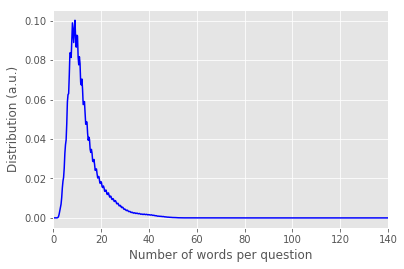

In [47]:
# question length distribution
plt.style.use('ggplot')
question_len.plot.density(color='blue')
plt.xlim(0, 140)
plt.xlabel('Number of words per question')
plt.ylabel('Distribution (a.u.)')
plt.show()

In [8]:
word_freq = nltk.FreqDist(itertools.chain(*questions))
len(word_freq)

307093

In [14]:
vocab_freq = word_freq.most_common(120000)

In [12]:
vocab_freq[1000], vocab_freq[10000], vocab_freq[50000], vocab_freq[70000]

(('network', 1708), ('shareholders', 94), ('blighted', 6), ('1045', 3))

In [15]:
vocab_freq[80000], vocab_freq[90000], vocab_freq[100000], vocab_freq[110000], vocab_freq[-500], vocab_freq[-1]

(('ecumenism', 3),
 ('CRIMINAL', 2),
 ('ACCENTURE', 2),
 ('wonderfull', 2),
 ('JAAT', 2),
 ('afghans', 2))